In [3]:
import numpy as np
import numpy.matlib


####  The below code is used to generate the data points.

In [169]:
# Generating two cluster od data points. The center are c1 and c2 respectively
# Class1 => Class1 datapoints
# Class2 => Class2 data points
#no => no of points in a class
c1 = [2,3]
c2 = [9,10]
no = 10
Class1 = np.matlib.repmat(c1, no,1) + np.random.randn(no,len(c1))
Class2 = np.matlib.repmat(c2, no,1) + np.random.randn(no,len(c2))
Data = np.append(Class1,Class2,axis = 0)
Trainlabel  = np.append(np.zeros((no,1)),np.ones((no,1)),axis = 0)

In [170]:
(m,n) = Data.shape
print Data.shape
print Trainlabel.shape
#print Trainlabel

(20, 2)
(20, 1)


#### Ploting the data points

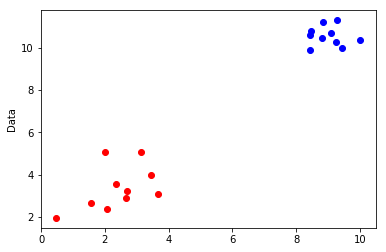

In [171]:
import matplotlib.pyplot as plt
plt.plot(Class1[:,0],Class1[:,1],'ro')
plt.plot(Class2[:,0],Class2[:,1],'bo')
plt.ylabel('Data')
plt.show()

#### Defining the sigmoid function

In [172]:
def sigmoid(x,play):
    z =  1/(1+np.exp(-x))
    if (play == "Forward"):
        return z
    elif (play == "Backward"):
        return z*(1-z)

#### Intializing the weights and bias to zeros

In [193]:
b = 0
w = np.zeros((n,1))
w1 = 0
w2 = 0
learningrate = 0.01
numiter = 100

In [194]:

for j in range(1,numiter):
    dw1 = 0
    dw2 = 0
    db = 0
    J = 0
    for i in range(0,m):
        
        z = w1 * Data[i,0] + w2 * Data[i,1] + b
        a = sigmoid(z,play ="Forward")
        J = J + -(Trainlabel[i,:]*np.log(a)+(1-Trainlabel[i,:])*np.log(1-a))
        dw1 = dw1 + (a -Trainlabel[i,:])*Data[i,0]
        dw2 = dw2 + (a - Trainlabel[i,:])*Data[i,1]
        db = db + (a - Trainlabel[i,:])
        
    J = J/m
    dw1 = dw1/m
    dw2 = dw2/m
    b= b/m
    
    w1 = w1 - learningrate * dw1
    w2 = w2 - learningrate * dw2
    b = b - learningrate * b
    print "Loss after ",j,"iteration =>",J
    


Loss after  1 iteration => [ 0.69314718]
Loss after  2 iteration => [ 0.64162871]
Loss after  3 iteration => [ 0.61333781]
Loss after  4 iteration => [ 0.59729627]
Loss after  5 iteration => [ 0.58785307]
Loss after  6 iteration => [ 0.5820966]
Loss after  7 iteration => [ 0.57847714]
Loss after  8 iteration => [ 0.57613694]
Loss after  9 iteration => [ 0.57458344]
Loss after  10 iteration => [ 0.57352455]
Loss after  11 iteration => [ 0.57278231]
Loss after  12 iteration => [ 0.57224579]
Loss after  13 iteration => [ 0.57184456]
Loss after  14 iteration => [ 0.57153321]
Loss after  15 iteration => [ 0.57128205]
Loss after  16 iteration => [ 0.5710715]
Loss after  17 iteration => [ 0.57088852]
Loss after  18 iteration => [ 0.57072437]
Loss after  19 iteration => [ 0.57057313]
Loss after  20 iteration => [ 0.57043079]
Loss after  21 iteration => [ 0.57029465]
Loss after  22 iteration => [ 0.57016282]
Loss after  23 iteration => [ 0.57003404]
Loss after  24 iteration => [ 0.56990741]
Los

#### Prediction for Traindata

In [190]:
##Predictions
pred = []
w = np.array([[w1],[w2]])
for i in range(0,m):
    a = sigmoid(np.dot(w.T,Data[i,:])+b,play="Forward")
    if (a > 0.5):
        pred.append(1)
    elif (a<=0.5):
        pred.append(0)
pred = np.array(pred)

In [191]:
print pred.T
print Trainlabel.T

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]]


In [177]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(Data, Trainlabel)
predicted = clf.predict(Data)  
predicted

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [178]:
x = np.arange(0,max(c2)+2)

In [179]:
y = -(w1/w2)*x - (b/w2)                                           

Tc1 = [4,3]
Tc2 = [9,7]
TClass1 = np.matlib.repmat(Tc1, no,1) + np.random.randn(no,len(c1))
TClass2 = np.matlib.repmat(Tc2, no,1) + np.random.randn(no,len(c2))
TData = np.append(TClass1,TClass2,axis = 0)
Testlabel  = np.append(np.zeros((no,1)),np.ones((no,1)),axis = 0)

#### Prediction for Testdata

In [180]:
##Predictions
pred = []
w = np.array([[w1],[w2]])
for i in range(0,m):
    a = sigmoid(np.dot(w.T,TData[i,:])+b,play="Forward")
    if (a > 0.5):
        pred.append(1)
    elif (a<=0.5):
        pred.append(0)
pred = np.array(pred)

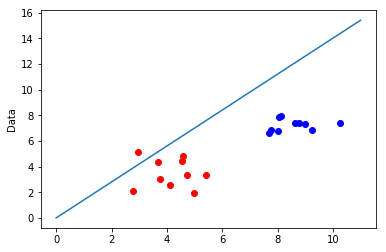

In [181]:
import matplotlib.pyplot as plt
plt.plot(TClass1[:,0],TClass1[:,1],'ro')
plt.plot(TClass2[:,0],TClass2[:,1],'bo')
plt.plot(x,y)
plt.ylabel('Data')
plt.show()

In [182]:
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [183]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(Data, Trainlabel)

predicted = clf.predict(TData)   


In [184]:
predicted

array([ 0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])